In [1]:
# Librerías 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#Valores en la frontera
Ta = 60
Tb = 40
Td = 80 

In [3]:
# Definimos la matriz de coeficientes y el vector solución 
A = np.array([[-4, 1, 0, 2, 0, 0, 0, 0, 0], [1, -4, 1, 0, 2, 0, 0, 0, 0], [0, 1, -4, 0, 0, 2, 0, 0, 0], 
              [1, 0, 0, -4, 1, 0, 1, 0, 0], [0, 1, 0, 1, -4, 1, 0, 1, 0], [0, 0, 1, 0, 1, -4, 0, 0, 1],
              [0, 0, 0, 1, 0, 0, -4, 1, 0], [0, 0, 0, 0, 1, 0, 1, -4, 1], [0, 0, 1, 0, 0, 0, 0, 1, -4]])
b = np.array([-Ta, 0, -Tb, -Ta, 0, -Tb, -(Ta+Td), -Td, -(Td+Tb)])
print(A)

[[-4  1  0  2  0  0  0  0  0]
 [ 1 -4  1  0  2  0  0  0  0]
 [ 0  1 -4  0  0  2  0  0  0]
 [ 1  0  0 -4  1  0  1  0  0]
 [ 0  1  0  1 -4  1  0  1  0]
 [ 0  0  1  0  1 -4  0  0  1]
 [ 0  0  0  1  0  0 -4  1  0]
 [ 0  0  0  0  1  0  1 -4  1]
 [ 0  0  1  0  0  0  0  1 -4]]


In [4]:
# Solución a los puntos internos
AI = np.linalg.inv(A)
#print (AI)
U = np.matmul(AI, b)
print(U)

[60.17609755 57.38657086 50.49154895 61.65890966 59.43931847 52.28981247
 67.02022264 66.42198089 59.22838246]


In [5]:
# PARÁMETROS DE LA PLACA
# Longitud de la placa
x0 = 0
xn = 2
y0 = 0
ym = 1.5
# Discretización
tramosx = 4
tramosy = 3
Dx = (xn-x0)/tramosx 
Dy = (ym-y0)/tramosy 

In [6]:
# Solución de la malla completa
xi = np.arange(x0,xn+Dx,Dx)
yj = np.arange(y0,ym+Dy,Dy)
n = len(xi)
m = len(yj)

u = np.zeros(shape=(m,n),dtype=float)
u[0,:]   = Td
u[:,0]   = Ta
u[:,n-1] = Tb
u[1,1:1+3] = U[6:6+3]
u[2,1:1+3] = U[3:3+3]
u[3,1:1+3] = U[0:0+3]
print('xi=', xi)
print('yj=', yj)
print('U=', u)
#print(u)

xi= [0.  0.5 1.  1.5 2. ]
yj= [0.  0.5 1.  1.5]
U= [[60.         80.         80.         80.         40.        ]
 [60.         67.02022264 66.42198089 59.22838246 40.        ]
 [60.         61.65890966 59.43931847 52.28981247 40.        ]
 [60.         60.17609755 57.38657086 50.49154895 40.        ]]


C:\Users\gurss\AppData\Local\Temp\ipykernel_4356\1994433486.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figura)


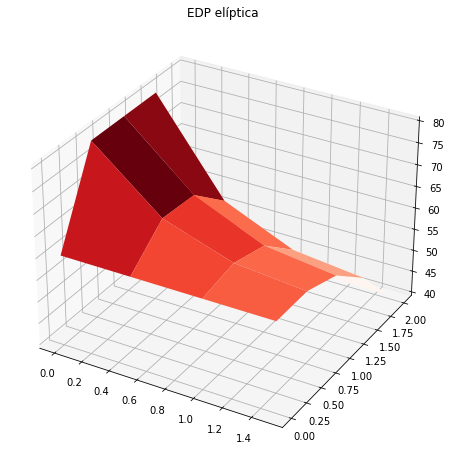

In [7]:
# Grafica de la temperatura
X, Y = np.meshgrid(yj, xi)
Ut = np.transpose(u)

figura = plt.figure(figsize = (8, 6))
ax = Axes3D(figura)
ax.plot_surface(X, Y, Ut, rstride=1, cstride=1, cmap=cm.Reds)

plt.title('EDP elíptica')
#plt.xlabel('x')
#plt.ylabel('y')
plt.show()